In [1]:
from __future__ import print_function

"""
A script to run cqed_rhf method on the formaldehyde coupled to a photon with 
different polarizations and coupling magnitude |\lambda| = 0.2 atomic units
to produce data from Table I of McTague and Foley 
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
from helper_cqed_rhf import *
from helper_ciss_prism import *
from matplotlib import pyplot as plt

# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2


  Memory set to   1.863 GiB by Python driver.


In [2]:
# rhf/cc-pVDZ optimized geometry of formaldehyde
molstr = """

0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1
"""

# options dict
options_dict = {'basis': 'cc-pVDZ',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-8,
               'd_convergence' : 1e-7}



In [3]:
# set cavity parameters
om = 0.3780197
lam = np.array([0, 0, 0.00])

# cqed-rhf
#cqed_rhf_dict = cqed_rhf(lam, molstr, options_dict)

# cqed-cis
cqed_cis_dict = cs_cqed_cis(lam, om, molstr, options_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960472248757
CQED-RHF One-electron energy      = -218.2835960472248757
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766174937   dE = -1.13877E+02   dRMS = 1.32300E-08
SCF Iteration   2: Energy = -113.8772221766176642   dE = -1.70530E-13   dRMS = 4.94894E-09
Total time for SCF iterations: 0.015 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree
240


In [4]:
scf_e = cqed_cis_dict["RHF ENERGY"]
cqed_scf_e = cqed_cis_dict["CQED-RHF ENERGY"]

ciss_pf_e = cqed_cis_dict["CISS-PF ENERGY"]
ciss_jc_e = cqed_cis_dict["CISS-JC ENERGY"]
cis_pf_e = cqed_cis_dict["CIS-PF ENERGY"]
cis_jc_e = cqed_cis_dict["CIS-JC ENERGY"]
cis_dse_e = cqed_cis_dict["CIS-DSE ENERGY"]


print(ciss_pf_e[1:8])
print(ciss_jc_e[1:8])
print(cis_pf_e[0:7])
print(cis_jc_e[0:7])
print(cis_dse_e[0:7])


[0.17370757 0.3780197  0.3780197  0.38038076 0.38795243 0.43760538
 0.47316562]
[0.17370757 0.3780197  0.3780197  0.38038076 0.38795243 0.43760538
 0.47316562]
[0.17370757 0.3780197  0.3780197  0.38038076 0.38795243 0.43760538
 0.47316562]
[0.17370757 0.3780197  0.3780197  0.38038076 0.38795243 0.43760538
 0.47316562]
[0.17370757 0.3780197  0.38038076 0.38795243 0.43760538 0.47316562
 0.47358619]


In [5]:
lam_z = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [6]:

ciss_pf = np.zeros((5,len(lam_z)))
ciss_jc = np.zeros((5,len(lam_z)))
cis_pf = np.zeros((5,len(lam_z)))
cis_jc = np.zeros((5,len(lam_z)))

# lambda vector
#lam = np.array([0,0,lam_z])

# loop over the different bond-lengths, create different instances
# of MgH+ molecule and compute and store various quantities
ctr = 0
for l in lam_z:
    lam = np.array([0, 0, l])
    
    cqed_cis_dict = cs_cqed_cis(lam, om, molstr, options_dict)
    # get cqed_scf_e
    cqed_scf_e = cqed_cis_dict["CQED-RHF ENERGY"]
    
    # get eigenvalues from CISS-PF
    ciss_pf_e = cqed_cis_dict["CISS-PF ENERGY"]
    # get eigenvalues from CISS-JC
    ciss_jc_e = cqed_cis_dict["CISS-JC ENERGY"]
    # get eigenvalues from CIS-PF
    cis_pf_e = cqed_cis_dict["CIS-PF ENERGY"]
    # get eigenvalues from CIS-JC
    cis_jc_e = cqed_cis_dict["CIS-JC ENERGY"]
    

    
    ciss_pf[:5,ctr] = cqed_scf_e+ciss_pf_e[:5]
    ciss_jc[:5,ctr] = cqed_scf_e+ciss_jc_e[:5]
    
    cis_pf[0,ctr] = cqed_scf_e
    cis_jc[0,ctr] = cqed_scf_e

    cis_pf[1:5,ctr] = cqed_scf_e + cis_pf_e[0:4]
    cis_jc[1:5,ctr] = cqed_scf_e + cis_jc_e[0:4]
    ctr += 1
    
    


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960472248757
CQED-RHF One-electron energy      = -218.2835960472248757
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766174937   dE = -1.13877E+02   dRMS = 1.32300E-08
SCF Iteration   2: Energy = -113.8772221766176642   dE = -1.70530E-13   dRMS = 4.94894E-09
Total time for SCF iterations: 0.014 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree
240

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960472248757
CQED-RHF One-electron energy      = -218.2818009907303463
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000713117729989
SCF Iteration   1: Energy = -113.8768027059858525   dE = -1.13877E+02   dRMS = 5.42812E-06
SCF Iteration   2: Energy = -113.8768027458014842   dE = -3.98156E-08   dRMS = 2.76634E-06
SCF

240

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960472248757
CQED-RHF One-electron energy      = -218.2387196348667544
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0017827943249714
SCF Iteration   1: Energy = -113.8667354108238499   dE = -1.13867E+02   dRMS = 1.35683E-04
SCF Iteration   2: Energy = -113.8667600221261011   dE = -2.46113E-05   dRMS = 6.87065E-05
SCF Iteration   3: Energy = -113.8667623282289298   dE = -2.30610E-06   dRMS = 3.74694E-05
SCF Iteration   4: Energy = -113.8667628083062198   dE = -4.80077E-07   dRMS = 3.12356E-05
SCF Iteration   5: Energy = -113.8667630129063753   dE = -2.04600E-07   dRMS = 2.27695E-05
SCF Iteration   6: Energy = -113.8667631263976148   dE = -1.13491E-07   dRMS = 1.82264E-05
SCF Iteration   7: Energy = -113.8667631932491986   dE = -6.68516E-08   dRMS = 1.38448E-05
SCF Iteration   8: Energy = -113.8667632332146411   dE = -3.99654E-08   dRMS = 1.08892E-05
SCF Iteration   9

SCF Iteration  29: Energy = -113.8567739622988881   dE = -2.41585E-12   dRMS = 8.71775E-08
Total time for SCF iterations: 0.213 seconds 

QED-RHF   energy: -113.85677396 hartree
Psi4  SCF energy: -113.87722218 hartree
240

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960472248757
CQED-RHF One-electron energy      = -218.1687124315879771
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0045639534719267
SCF Iteration   1: Energy = -113.8503760561855245   dE = -1.13850E+02   dRMS = 3.47348E-04
SCF Iteration   2: Energy = -113.8505345311767485   dE = -1.58475E-04   dRMS = 1.74161E-04
SCF Iteration   3: Energy = -113.8505491783389800   dE = -1.46472E-05   dRMS = 9.42571E-05
SCF Iteration   4: Energy = -113.8505522862232056   dE = -3.10788E-06   dRMS = 7.81838E-05
SCF Iteration   5: Energy = -113.8505536062503438   dE = -1.32003E-06   dRMS = 5.61609E-05
SCF Iteration   6: Energy = -113.8505543245994716   dE = -7.18349E-07   

SCF Iteration  28: Energy = -113.8357055554377268   dE = -1.03455E-11   dRMS = 1.65098E-07
SCF Iteration  29: Energy = -113.8357055554432691   dE = -5.54223E-12   dRMS = 1.25730E-07
SCF Iteration  30: Energy = -113.8357055554468786   dE = -3.60956E-12   dRMS = 9.57572E-08
Total time for SCF iterations: 0.222 seconds 

QED-RHF   energy: -113.83570556 hartree
Psi4  SCF energy: -113.87722218 hartree
240


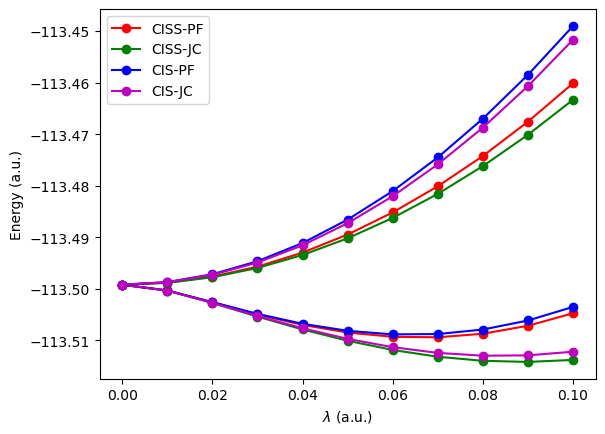

In [7]:
from matplotlib import pyplot as plt

plt.plot(lam_z, ciss_pf[2,:], 'r-o', label='CISS-PF')
plt.plot(lam_z, ciss_jc[2,:], 'g-o', label='CISS-JC')
plt.plot(lam_z, cis_pf[2,:], 'b-o', label='CIS-PF')
plt.plot(lam_z, cis_jc[2,:], 'm-o', label='CIS-JC')
plt.plot(lam_z, ciss_pf[3,:], 'r-o')
plt.plot(lam_z, ciss_jc[3,:], 'g-o')
plt.plot(lam_z, cis_pf[3,:], 'b-o')
plt.plot(lam_z, cis_jc[3,:], 'm-o')
#plt.plot(lam_z, ciss_pf[0,:], 'r--')
#plt.plot(lam_z, ciss_jc[0,:], 'g--')
#plt.plot(lam_z, cis_pf[0,:], 'b--')
#plt.plot(lam_z, cis_jc[0,:], 'm--')

plt.xlabel("$\lambda$ (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.legend()
#plt.savefig("Compare_Prism.png")
plt.show()

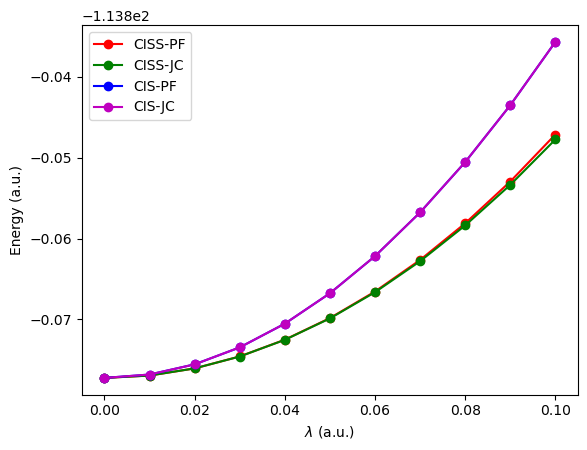

In [8]:
plt.plot(lam_z, ciss_pf[0,:], 'r-o', label='CISS-PF')
plt.plot(lam_z, ciss_jc[0,:], 'g-o', label='CISS-JC')
plt.plot(lam_z, cis_pf[0,:], 'b-o', label='CIS-PF')
plt.plot(lam_z, cis_jc[0,:], 'm-o', label='CIS-JC')

plt.xlabel("$\lambda$ (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.legend()
#plt.savefig("Compare_Prism.png")
plt.show()

In [10]:
for i in range(len(lam_z)):
    print(lam_z[i], ciss_pf[0,i], ciss_pf[2,i], ciss_pf[3,i], 
          ciss_jc[0,i], ciss_jc[2,i], ciss_jc[3,i],
          cis_pf[0,i], cis_pf[2,i], cis_pf[3,i],
          cis_jc[0,i], cis_jc[2,i], cis_jc[3,i])

0.0 -113.87722217661766 -113.49920247872937 -113.49920247661767 -113.87722217661766 -113.49920247872937 -113.49920247661767 -113.87722217661766 -113.49920247872937 -113.49920247661767 -113.87722217661766 -113.49920247872937 -113.49920247661767
0.01 -113.8769282385203 -113.50033116437989 -113.49881455489955 -113.87692830923993 -113.50034471522984 -113.49884261797649 -113.87680275114374 -113.50032545260505 -113.4986972828909 -113.87680275114374 -113.50033889531629 -113.49872528764462
0.02 -113.87604547537158 -113.50262121768145 -113.4976467767676 -113.87604660182738 -113.50274867215984 -113.49775955875302 -113.87554501560444 -113.50257742019325 -113.4971784874081 -113.87554501560444 -113.50270280981515 -113.49729033823463
0.03 -113.87457108869044 -113.5049800051023 -113.49570382039549 -113.87457674922442 -113.50538827063262 -113.49595956375747 -113.87345058419132 -113.50486555986362 -113.49465314077237 -113.87345058419132 -113.50526545937272 -113.49490418707713
0.04 -113.87250054454222 -